In [1]:
#Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Create a set of random latitudes and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
#Import citipy
from citipy import citipy

In [5]:
#Create a list for holding the cities.
cities = []

#Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
#Print the city count to confirm sufficient count.
len(cities)

596

In [6]:
#Import the reqeusts library.
import requests

#Import the API key.
from config import weather_api_key

In [7]:
#Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [8]:
#Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []

#Print the beginning of the logging.
print("Beginning Data Retrieval")
print("------------------------")

#Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
 

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | darhan
Processing Record 4 of Set 1 | tiksi
Processing Record 5 of Set 1 | lebu
Processing Record 6 of Set 1 | shangrao
Processing Record 7 of Set 1 | ponta do sol
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | pafos
Processing Record 11 of Set 1 | victoria
Processing Record 12 of Set 1 | quelimane
Processing Record 13 of Set 1 | sinkat
City not found. Skipping...
Processing Record 14 of Set 1 | qaanaaq
Processing Record 15 of Set 1 | kaitangata
Processing Record 16 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 1 | san cristobal
Processing Record 18 of Set 1 | rio grande
Processing Record 19 of Set 1 | huangpi
Processing Record 20 of Set 1 | bambous virieux
Processing Record 21 of Set 1 | vestmannaeyjar
Processing Record 22 of Se

Processing Record 37 of Set 4 | severo-kurilsk
Processing Record 38 of Set 4 | micheweni
Processing Record 39 of Set 4 | katha
City not found. Skipping...
Processing Record 40 of Set 4 | ayagoz
Processing Record 41 of Set 4 | norman wells
Processing Record 42 of Set 4 | porto belo
Processing Record 43 of Set 4 | san pedro
Processing Record 44 of Set 4 | manaure
Processing Record 45 of Set 4 | inyonga
Processing Record 46 of Set 4 | san lucas
Processing Record 47 of Set 4 | cayenne
Processing Record 48 of Set 4 | banamba
Processing Record 49 of Set 4 | mlonggo
Processing Record 50 of Set 4 | bengkulu
Processing Record 1 of Set 5 | east london
Processing Record 2 of Set 5 | prince rupert
Processing Record 3 of Set 5 | santa fe
Processing Record 4 of Set 5 | whitianga
Processing Record 5 of Set 5 | remanso
Processing Record 6 of Set 5 | ust-kuyga
Processing Record 7 of Set 5 | noumea
Processing Record 8 of Set 5 | coquimbo
Processing Record 9 of Set 5 | jumla
Processing Record 10 of Set 5

Processing Record 25 of Set 8 | antalaha
Processing Record 26 of Set 8 | atambua
Processing Record 27 of Set 8 | skalistyy
City not found. Skipping...
Processing Record 28 of Set 8 | fortuna
Processing Record 29 of Set 8 | otane
Processing Record 30 of Set 8 | solnechnyy
Processing Record 31 of Set 8 | mocuba
Processing Record 32 of Set 8 | basco
Processing Record 33 of Set 8 | ribeira brava
Processing Record 34 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 35 of Set 8 | bambanglipuro
Processing Record 36 of Set 8 | los llanos de aridane
Processing Record 37 of Set 8 | praia da vitoria
Processing Record 38 of Set 8 | hanmer springs
Processing Record 39 of Set 8 | babanusah
City not found. Skipping...
Processing Record 40 of Set 8 | kaeo
Processing Record 41 of Set 8 | pimenta bueno
Processing Record 42 of Set 8 | mangrol
Processing Record 43 of Set 8 | iranshahr
Processing Record 44 of Set 8 | lekoni
Processing Record 45 of Set 8 | caravelas
Processing Record 46 of Set 8 | tem

Processing Record 17 of Set 12 | nuuk
Processing Record 18 of Set 12 | marawi
Processing Record 19 of Set 12 | kochevo
Processing Record 20 of Set 12 | malwan
City not found. Skipping...
Processing Record 21 of Set 12 | sindal
Processing Record 22 of Set 12 | fallon
Processing Record 23 of Set 12 | horsham
Processing Record 24 of Set 12 | tucuman
Processing Record 25 of Set 12 | labrea
Processing Record 26 of Set 12 | borgarnes
Processing Record 27 of Set 12 | shiogama
Processing Record 28 of Set 12 | gravelbourg
Processing Record 29 of Set 12 | nizwa
Processing Record 30 of Set 12 | kotelnich
Processing Record 31 of Set 12 | charters towers
Processing Record 32 of Set 12 | ulfborg
Processing Record 33 of Set 12 | foshan
Processing Record 34 of Set 12 | skagastrond
City not found. Skipping...
Processing Record 35 of Set 12 | yanan
City not found. Skipping...
Processing Record 36 of Set 12 | valley city
Processing Record 37 of Set 12 | kijang
Processing Record 38 of Set 12 | moratuwa
Pr

In [10]:
len(city_data)

551

In [11]:
#Convert the array of dictionaries top a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.8000,-139.0333,77.38,72,52,23.67,PF,2021-07-25 18:00:45
1,Port Alfred,-33.5906,26.8910,61.03,49,27,11.43,ZA,2021-07-25 18:00:46
2,Darhan,49.4867,105.9228,59.77,73,96,4.74,MN,2021-07-25 18:00:46
3,Tiksi,71.6872,128.8694,48.00,81,83,7.23,RU,2021-07-25 17:58:37
4,Lebu,-37.6167,-73.6500,51.17,89,89,4.50,CL,2021-07-25 18:00:46
5,Shangrao,28.4532,117.9686,75.25,91,99,9.40,CN,2021-07-25 18:00:47
6,Ponta Do Sol,32.6667,-17.1000,78.71,76,6,5.08,PT,2021-07-25 18:00:47
7,Rikitea,-23.1203,-134.9692,70.34,65,97,3.91,PF,2021-07-25 17:58:05
8,Punta Arenas,-53.1500,-70.9167,41.11,63,86,16.06,CL,2021-07-25 18:00:48
9,Pafos,34.7667,32.4167,82.24,78,0,11.50,CY,2021-07-25 18:00:48


In [12]:
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.8000,-139.0333,77.38,72,52,23.67,PF,2021-07-25 18:00:45
1,Port Alfred,-33.5906,26.8910,61.03,49,27,11.43,ZA,2021-07-25 18:00:46
2,Darhan,49.4867,105.9228,59.77,73,96,4.74,MN,2021-07-25 18:00:46
3,Tiksi,71.6872,128.8694,48.00,81,83,7.23,RU,2021-07-25 17:58:37
4,Lebu,-37.6167,-73.6500,51.17,89,89,4.50,CL,2021-07-25 18:00:46
...,...,...,...,...,...,...,...,...,...
546,Husavik,66.0449,-17.3389,56.59,67,100,4.14,IS,2021-07-25 18:03:45
547,Nong Phai,15.9903,101.0618,74.01,94,100,2.66,TH,2021-07-25 18:03:46
548,Chapais,49.7834,-74.8492,65.98,53,46,12.37,CA,2021-07-25 18:03:46
549,Srivardhan,18.0333,73.0167,80.15,88,100,17.56,IN,2021-07-25 18:03:46


In [13]:
#Reorder the columns 
city_data_df_new_order = ["City", "Country", "Date","Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[city_data_df_new_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Atuona,PF,2021-07-25 18:00:45,-9.8000,-139.0333,77.38,72,52,23.67
1,Port Alfred,ZA,2021-07-25 18:00:46,-33.5906,26.8910,61.03,49,27,11.43
2,Darhan,MN,2021-07-25 18:00:46,49.4867,105.9228,59.77,73,96,4.74
3,Tiksi,RU,2021-07-25 17:58:37,71.6872,128.8694,48.00,81,83,7.23
4,Lebu,CL,2021-07-25 18:00:46,-37.6167,-73.6500,51.17,89,89,4.50
...,...,...,...,...,...,...,...,...,...
546,Husavik,IS,2021-07-25 18:03:45,66.0449,-17.3389,56.59,67,100,4.14
547,Nong Phai,TH,2021-07-25 18:03:46,15.9903,101.0618,74.01,94,100,2.66
548,Chapais,CA,2021-07-25 18:03:46,49.7834,-74.8492,65.98,53,46,12.37
549,Srivardhan,IN,2021-07-25 18:03:46,18.0333,73.0167,80.15,88,100,17.56


In [14]:
#Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

#Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


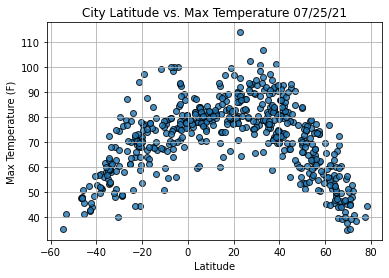

In [16]:
#Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig1.png")

#show plot.
plt.show()

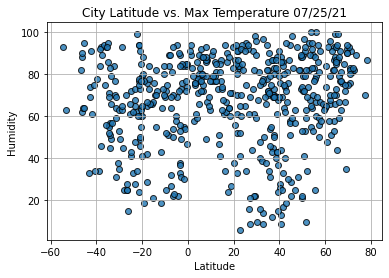

In [17]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig2.png")

#show plot.
plt.show()

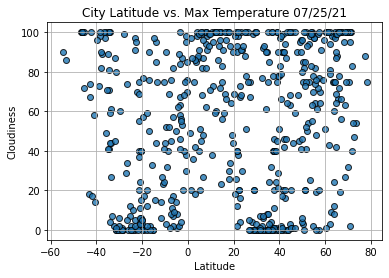

In [18]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig3.png")

#show plot.
plt.show()

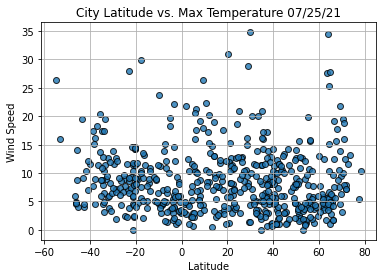

In [19]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig4.png")

#show plot.
plt.show()

In [35]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()  

In [36]:
#Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

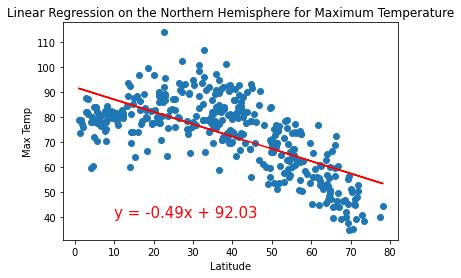

In [44]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

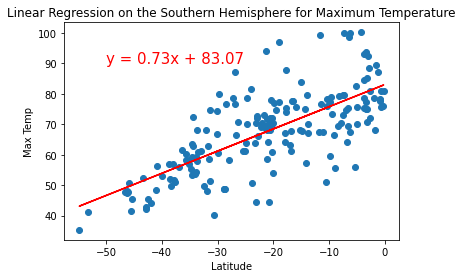

In [45]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

#Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere for Maximum Temperature", 'Max Temp', (-50,90))

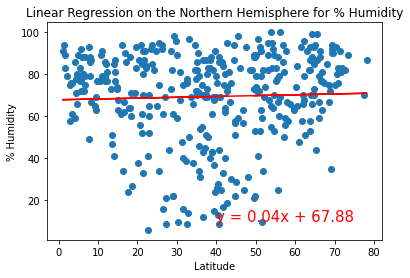

In [57]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

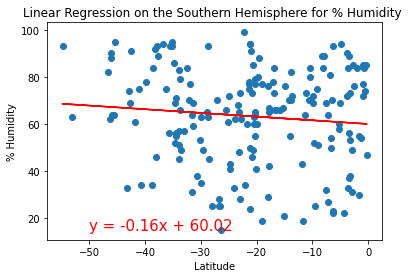

In [58]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

#Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere for % Humidity ", '% Humidity', (-50,15))

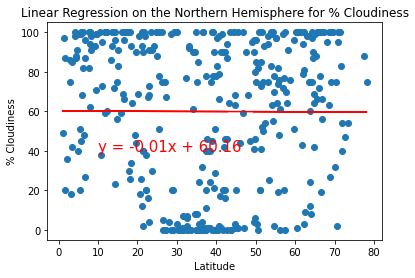

In [50]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(10,40))

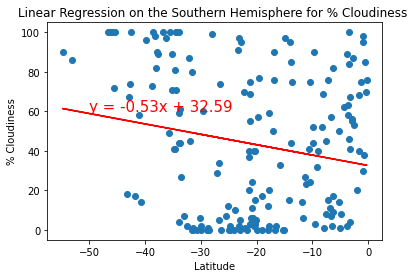

In [56]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

#Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere for % Cloudiness ", '% Cloudiness', (-50,60))

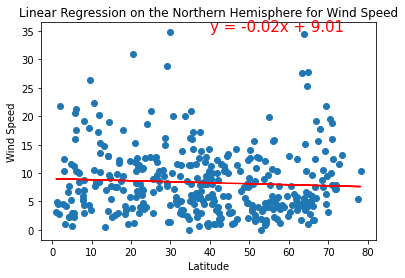

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

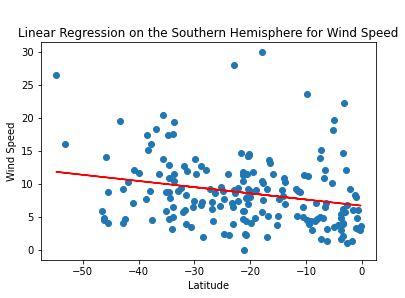

In [59]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

#Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere for Wind Speed", 'Wind Speed', (-50,35))